In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import random
from scipy.integrate import odeint

In [42]:
S0 = 0.998
E0 = 0
I0 = 0.002
H0 = 0
R0 = 0
D0 = 0
def seird(p,q,beta,gamma,lamda,theta,delta,tmax):
    N = S0 + R0 + I0
    t = np.linspace(0,tmax,tmax+1)
    def derive(y,t,p,q,beta,gamma,lamda,theta,delta):    
        S,E,I,H,R,D = y
        dSdt = (-beta*S*I)/N
        dEdt = (beta*S*I)/N - (beta*E)
        dIdt = (beta*E) - (p*gamma*I) - (1-p)*lamda*I
        dHdt = (1-p)*lamda*I - (1-q)*delta*H - q*theta*H 
        dRdt = (p*gamma*I) + (q*theta*H)
        dDdt = (1-q)*delta*H    
        return dSdt,dEdt,dIdt,dHdt,dRdt,dDdt
    
    y0 = S0,E0,I0,H0,R0,D0
    ret = odeint(derive,y0,t,args=(p,q,beta,gamma,lamda,theta,delta))
    S,E,I,H,R,D  = ret.T
    temps = range(0,(tmax+1),1) 
    return t,S,E,I,H,R,D   
    
t,S,E,I,H,R,D = seird(0.8,0.7,0.2,0.06,0.03,0.03,0.02,150)

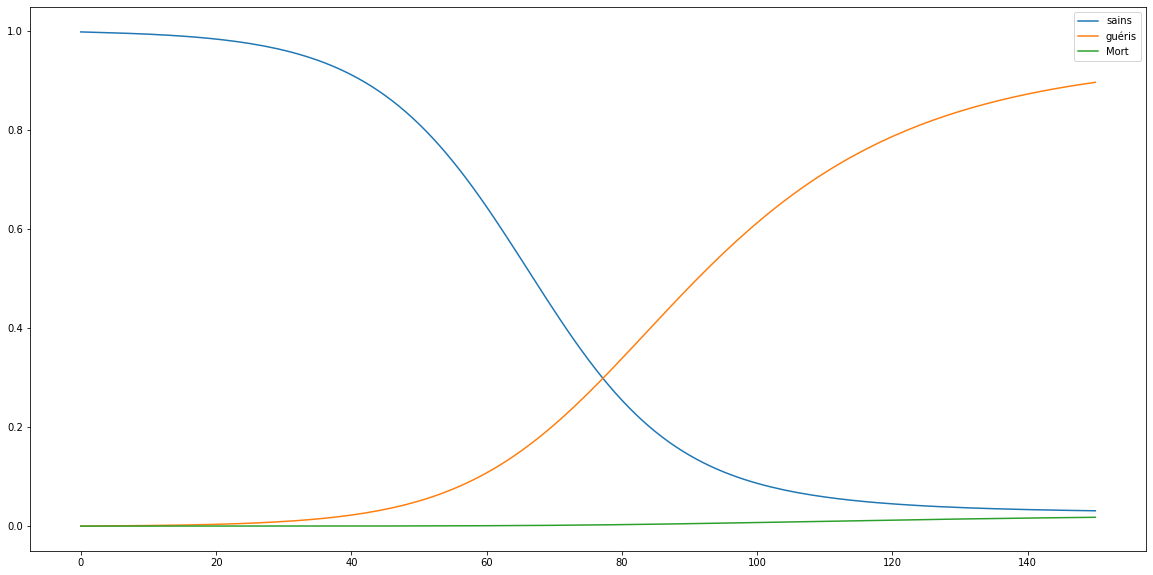

In [48]:
plt.figure(figsize=(20,10))
plt.plot(t,S,label='sains')
plt.plot(t,R,label='guéris')
plt.plot(t,D,label='Mort')
plt.legend()

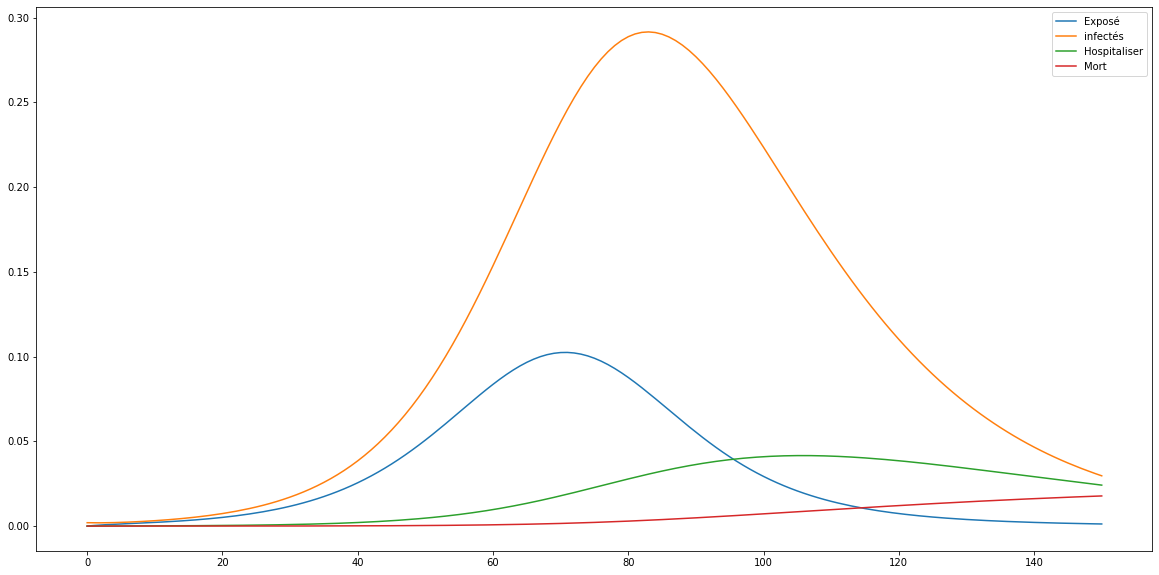

In [44]:
plt.figure(figsize=(20,10))
plt.plot(t,E,label='Exposé')
plt.plot(t,I,label='infectés')
plt.plot(t,H,label='Hospitaliser')
plt.plot(t,D,label='Mort')
plt.legend()